# Nearest-Neighbor-Algorithmus für das Traveling Salesman Problem

---

## 1. Einführung in das Problem

Das **Traveling Salesman Problem (TSP)** ist ein klassisches Problem der Informatik und Optimierung. Es modelliert folgende Situation:

Ein Reisender soll mehrere Punkte besuchen. Er möchte dabei:
- Jeden Punkt genau einmal besuchen
- Am Ende zu seinem Ausgangspunkt zurückkehren
- Die zurückgelegte Gesamtstrecke minimieren

**Anwendungsbeispiele:**
- Tourenplanung 
- Optimierung von Wartungsrouten
- Leiterplattenherstellung (Bewegungsprofil für Bohrungen etc) | CNC,Laser etc



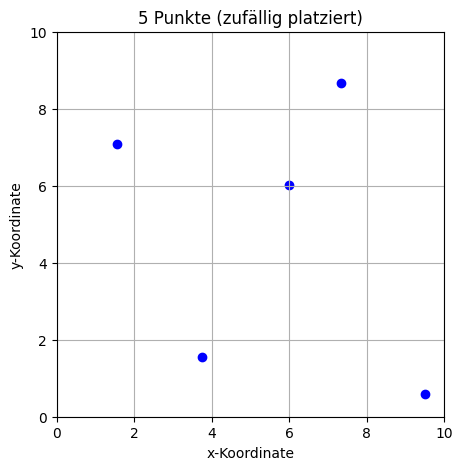

In [1]:
# Vorbereitung: Notwendige Bibliotheken importieren und Testdaten generieren

import numpy as np
import matplotlib.pyplot as plt
import math
import time  # Für Zeitmessungen der Algorithmen

# Hilfsfunktion zum Visualisieren der Punktemenge
def plot():
    plt.figure(figsize=(5, 5))
    plt.scatter(x, y, color='blue')  # Punkte als Scatterplot darstellen
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid(True)
    plt.title(f'{number_of_points} Punkte (zufällig platziert)')
    plt.xlabel('x-Koordinate')
    plt.ylabel('y-Koordinate')
    plt.show()

# Distanzfunktion zur Berechnung der Gesamtlänge einer Route
def route_distance(route):
    # Für eine gegebene Route berechnen wir die Gesamtdistanz,
    # indem wir die Distanzen zwischen jedem aufeinanderfolgenden Punktpaar aufsummieren.
    d = sum(math.dist(route[i], route[i+1]) for i in range(len(route)-1))
    # Abschließend wird die Distanz vom letzten Punkt zurück zum Startpunkt addiert,
    # um den Rundweg zu schließen.
    return d + math.dist(route[-1], route[0])

# Für die Reproduzierbarkeit: Feste Zufallszahlen
number_of_points = 5  # Anzahl der Punkte
np.random.seed(42)    # Für reproduzierbare Ergebnisse

# Generiere zufällige Koordinaten im Bereich [0, 10] × [0, 10]
x = np.random.rand(number_of_points) * 10  # x-Koordinaten
y = np.random.rand(number_of_points) * 10  # y-Koordinaten

# Erstelle Liste von Punkten als (x,y)-Koordinatenpaare
points = list(zip(x, y))

# Dictionary für spätere Ergebnisauswertung vorbereiten
algorithm_results = {
    'nearest_neighbor': {'distance': None, 'time': None, 'operations': None}
}

# Visualisiere die generierten Punkte
plot()

## 2. Nearest-Neighbor-Algorithmus

Der Nearest-Neighbor-Algorithmus (Nächster-Nachbar-Algorithmus) ist eine einfache Strategie, die auf gesundem Menschenverstand basiert:

1. Beginne an einem beliebigen Startpunkt
2. Finde den nächstgelegenen Punkt, der noch nicht besucht wurde
3. Gehe zu diesem Punkt
4. Wiederhole Schritte 2-3, bis alle Punkte besucht wurden
5. Kehre zurück zum Ausgangspunkt, um die Tour abzuschließen

**Alltagsbeispiel**: Sammeln von Pilzen im Wald. Sie könnten intuitiv immer zum nächstgelegenen Pilz gehen, den Sie noch nicht gesammelt haben. Dies entspricht genau der Nearest-Neighbor-Strategie.

**Vorteile**:
- Sehr einfach zu verstehen und zu implementieren
- Deutlich schneller als Brute-Force (funktioniert auch für viele Punkte)
- Liefert oft recht gute (aber nicht optimale) Lösungen

**Nachteile**:
- Kann in bestimmten Fällen sehr schlechte Lösungen liefern
- Die Qualität der Lösung hängt stark vom gewählten Startpunkt ab

### Mathematische Grundlage

Der Nearest-Neighbor-Algorithmus ist eine Greedy-Heuristik mit folgender Vorgehensweise:

1. Starte bei einem beliebigen Knoten $v_0$ als aktuellem Knoten.
2. Finde den nächsten unbesuchten Knoten $v_i$ zum aktuellen Knoten, d.h. minimiere $d(v_{current}, v_i)$ über alle unbesuchten Knoten $v_i$.
3. Füge $v_i$ zur Tour hinzu und setze $v_i$ als aktuellen Knoten.
4. Wiederhole Schritte 2 und 3, bis alle Knoten besucht sind.
5. Kehre zum Startknoten $v_0$ zurück, um den Kreis zu schließen.

Mathematisch ausgedrückt: In jedem Schritt $i$ wählen wir den Knoten $v_i$, sodass:

$$ v_i = \arg\min_{v \in V_{unvisited}} d(v_{current}, v) $$

Die Zeitkomplexität beträgt $O(n^2)$, was deutlich effizienter als die Brute-Force-Methode ist. Allerdings garantiert dieser Algorithmus keine optimale Lösung und kann im schlimmsten Fall eine Tour liefern, die $\Theta(\log n)$ mal länger als die optimale Tour ist.

**Einfach ausgedrückt**: Bei 100 Punkten müssen wir nur etwa 10.000 Vergleiche durchführen, statt 10^158 Routen wie bei Brute-Force. Das ist ein enormer Unterschied!

In [2]:
from IPython.display import display

def nearest_neighbor(points):
    # Zähler für Operationen
    operations = 0
    
    # Falls keine Punkte vorhanden sind, gebe eine leere Liste zurück.
    if not points:
        return [], operations
    
    route = [points[0]]    # Beginne die Route mit dem ersten Punkt.
    
    remaining_points = points[1:] # Erstelle eine Liste der noch nicht besuchten Punkte (außer dem Startpunkt).
    
    # Solange noch Punkte übrig sind:
    while remaining_points:
        # Der aktuelle Punkt ist immer der letzte in der Route.
        current = route[-1]
        # Finde den nächsten Punkt, der am nächsten zum aktuellen liegt.
        nearest = min(remaining_points, key=lambda p: math.dist(current, p))
        operations += len(remaining_points)  # Zähle Distanzberechnungen
        # Füge diesen Punkt der Route hinzu.
        route.append(nearest)
        # Entferne den neu besuchten Punkt aus der Liste der verbleibenden Punkte.
        remaining_points.remove(nearest)
    
    return route, operations
    # Laufzeit dieser Funktion: O(n^2) wesentlich schneller als O(n!)

In [3]:
# Berechne die Route mit dem Nearest-Neighbor-Algorithmus
start_time_nn = time.time()  # Startzeit messen
nn_route, operation_count_nn = nearest_neighbor(points) 
end_time_nn = time.time()  # Endzeit messen
execution_time_nn = end_time_nn - start_time_nn  # Berechnungszeit in Sekunden

# Berechne die Gesamtdistanz der gefundenen Route, inklusive Rückweg zum Startpunkt.
nn_distance = route_distance(nn_route)

# Speichere Ergebnisse
algorithm_results['nearest_neighbor']['distance'] = nn_distance
algorithm_results['nearest_neighbor']['time'] = execution_time_nn
algorithm_results['nearest_neighbor']['operations'] = operation_count_nn

print(f"Nearest-Neighbor Route-Länge: {nn_distance:.2f}")
print(f"Berechnungszeit: {execution_time_nn:.6f} Sekunden")
print(f"Anzahl der Distanzberechnungen: {operation_count_nn}")

Nearest-Neighbor Route-Länge: 30.03
Berechnungszeit: 0.000000 Sekunden
Anzahl der Distanzberechnungen: 10


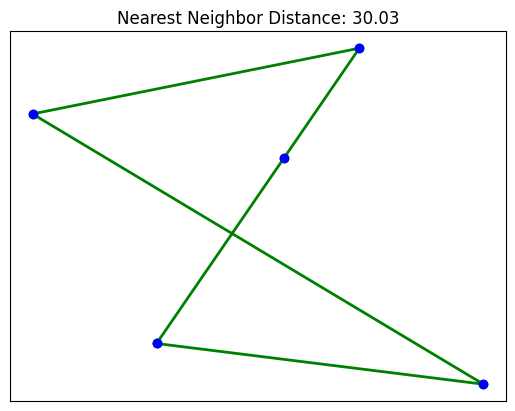

In [4]:
def plot_nearest_neighbor():
    # Plotten der Nearest-Neighbor-Route:
    plt.clf()  # Aktuelle Grafik löschen
    # Extrahiere die x- und y-Koordinaten aller Punkte und plote sie als blauen Scatterplot.
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    plt.scatter(x_coords, y_coords, color='blue', zorder=5)

    # Erstelle Listen für die x- und y-Koordinaten der Route.
    # Schließe die Route, indem du den Startpunkt am Ende wieder hinzufügst.
    xs_nn = [p[0] for p in nn_route] + [nn_route[0][0]]
    ys_nn = [p[1] for p in nn_route] + [nn_route[0][1]]
    # Verbinde die Punkte der Route mit einer grünen Linie und markiere jeden Punkt.
    plt.plot(xs_nn, ys_nn, color='green', linewidth=2, marker='o')

    # Füge einen Titel hinzu, der die Gesamtdistanz der Route anzeigt.
    plt.title(f"Nearest Neighbor Distance: {nn_distance:.2f}")

    # Entferne die Achsenbeschriftungen.
    plt.xticks([])
    plt.yticks([])
    plt.savefig("nearest_neighbor.png", dpi=300, format="png", bbox_inches="tight")
    plt.show()

# Visualisiere die gefundene Route
plot_nearest_neighbor()

### Animation des Nearest-Neighbor-Algorithmus

Die folgende Animation zeigt schrittweise, wie der Nearest-Neighbor-Algorithmus funktioniert:

In [5]:
from ipywidgets import Play, IntSlider, jslink, VBox, Output
from IPython.display import display

# Create an output widget for the animation.
out = Output()

play = Play(
    value=0,
    min=0,
    max=len(nn_route),
    step=1,
    interval=500
)

slider = IntSlider(
    value=0,
    min=0,
    max=len(nn_route),
    step=1
)

jslink((play, 'value'), (slider, 'value'))

def animate_nn(i):
    plt.clf()
    # Plot all points as blue scatterplot.
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    plt.scatter(x_coords, y_coords, color='blue', zorder=5)
    
    # Plot the partial route from the nearest neighbor route.
    if i > 0:
        xs = [p[0] for p in nn_route[:i]]
        ys = [p[1] for p in nn_route[:i]]
        if i == len(nn_route):
            xs.append(nn_route[0][0])
            ys.append(nn_route[0][1])
        plt.plot(xs, ys, color='green', linewidth=2, marker='o')
        
        # Visualize the query from the current point to all remaining points.
        current_point = nn_route[i-1]
        # Determine remaining points (unvisited points)
        remaining = [p for p in points if p not in nn_route[:i]]
        for candidate in remaining:
            plt.plot([current_point[0], candidate[0]], [current_point[1], candidate[1]], 
                     color='orange', linestyle='--', linewidth=1)
    
    # Remove the axis labels.
    plt.xticks([])
    plt.yticks([])
    plt.show()

def on_slider_change(change):
    with out:
        out.clear_output(wait=True)
        animate_nn(change['new'])

slider.observe(on_slider_change, names='value')

display(VBox([play, slider, out]))

## 3. Nearest-Neighbor mit mehreren Startpunkten

Da die Qualität der Nearest-Neighbor-Lösung stark vom Startpunkt abhängen kann, ist es eine gängige Strategie, den Algorithmus mit jedem möglichen Startpunkt auszuführen und die beste gefundene Lösung zu behalten.

In [6]:
def nearest_neighbor_multiple_starts(points):
    """Führt den Nearest-Neighbor-Algorithmus für jeden möglichen Startpunkt aus und gibt die beste Lösung zurück.
    
    Parameter:
      points (list): Liste von (x,y)-Koordinatenpaaren der Punkte
    
    Rückgabe:
      tuple: (beste Route, kürzeste Distanz, Startindex, Anzahl der Operationen)
    """
    best_route = None
    best_distance = float('inf')
    best_start_index = -1
    total_operations = 0
    
    # Teste jeden Punkt als Startpunkt
    for start_index in range(len(points)):
        # Reorganisiere die Punkte so, dass der ausgewählte Startpunkt der erste ist
        reordered_points = points[start_index:] + points[:start_index]
        
        # Führe den Nearest-Neighbor-Algorithmus mit diesem Startpunkt aus
        route, operations = nearest_neighbor(reordered_points)
        total_operations += operations
        
        # Berechne die Gesamtdistanz
        distance = route_distance(route)
        
        # Aktualisiere die beste Route falls nötig
        if distance < best_distance:
            best_distance = distance
            best_route = route
            best_start_index = start_index
    
    return best_route, best_distance, best_start_index, total_operations

In [7]:
# Führe den Nearest-Neighbor-Algorithmus mit mehreren Startpunkten aus
start_time = time.time()
best_nn_route, best_nn_distance, best_start, total_ops = nearest_neighbor_multiple_starts(points)
execution_time = time.time() - start_time

print(f"Beste Nearest-Neighbor Route-Länge: {best_nn_distance:.2f}")
print(f"Bester Startpunkt: {best_start}")
print(f"Berechnungszeit: {execution_time:.6f} Sekunden")
print(f"Anzahl der Distanzberechnungen: {total_ops}")

Beste Nearest-Neighbor Route-Länge: 27.19
Bester Startpunkt: 3
Berechnungszeit: 0.000999 Sekunden
Anzahl der Distanzberechnungen: 50


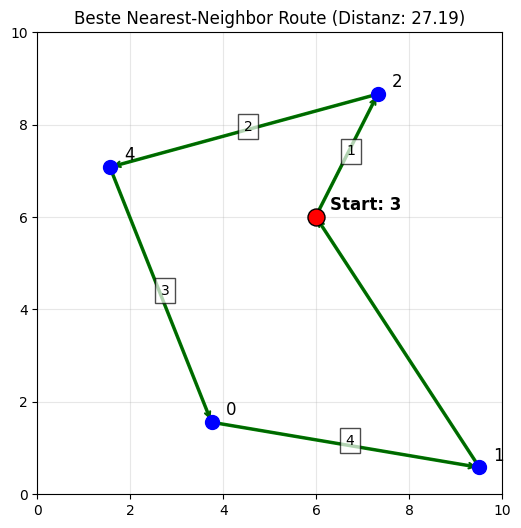

In [8]:
def plot_best_nn():
    # Plotten der besten Nearest-Neighbor-Route:
    plt.figure(figsize=(6, 6))
    
    # Extrahiere die x- und y-Koordinaten aller Punkte
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    
    # Hervorheben des Startpunkts
    for i, (x, y) in enumerate(points):
        if i == best_start:
            plt.scatter(x, y, color='red', s=150, zorder=10, edgecolor='black')
            plt.annotate(f"Start: {i}", (x, y), xytext=(10, 5), textcoords="offset points", fontsize=12, weight='bold')
        else:
            plt.scatter(x, y, color='blue', s=100, zorder=5)
            plt.annotate(f"{i}", (x, y), xytext=(10, 5), textcoords="offset points", fontsize=12)
    
    # Erstelle Listen für die x- und y-Koordinaten der Route
    xs_nn = [p[0] for p in best_nn_route] + [best_nn_route[0][0]]
    ys_nn = [p[1] for p in best_nn_route] + [best_nn_route[0][1]]
    
    # Verbinde die Punkte der Route mit einer grünen Linie
    plt.plot(xs_nn, ys_nn, color='green', linewidth=2.5, marker='o')
    
    # Zeige die Reihenfolge der Besuche
    for i in range(len(best_nn_route)-1):
        plt.annotate("", 
                    xy=(best_nn_route[i+1][0], best_nn_route[i+1][1]),
                    xytext=(best_nn_route[i][0], best_nn_route[i][1]),
                    arrowprops=dict(arrowstyle="->", color='darkgreen', lw=1.5))
        midx = (best_nn_route[i][0] + best_nn_route[i+1][0]) / 2
        midy = (best_nn_route[i][1] + best_nn_route[i+1][1]) / 2
        plt.text(midx, midy, str(i+1), fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
    
    # Zeichne den Rückweg zum Startpunkt
    plt.annotate("", 
                xy=(best_nn_route[0][0], best_nn_route[0][1]),
                xytext=(best_nn_route[-1][0], best_nn_route[-1][1]),
                arrowprops=dict(arrowstyle="->", color='darkgreen', lw=1.5))
    
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.title(f"Beste Nearest-Neighbor Route (Distanz: {best_nn_distance:.2f})")
    plt.show()

# Visualisiere die beste gefundene Route
plot_best_nn()

## 4. Vergleich von Nearest-Neighbor mit größeren Datensätzen

Der Nearest-Neighbor-Algorithmus eignet sich gut für größere Datensätze. Lassen Sie uns einen Test mit 30 Punkten durchführen:

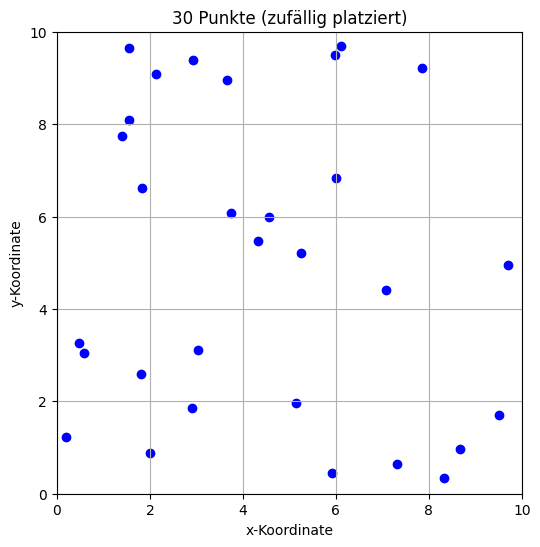

In [9]:
# Erzeuge eine größere Punktemenge mit 30 Punkten
np.random.seed(42)  # Für reproduzierbare Ergebnisse
number_of_points_large = 30
x_large = np.random.rand(number_of_points_large) * 10
y_large = np.random.rand(number_of_points_large) * 10
points_large = list(zip(x_large, y_large))

# Erstelle eine Grafik und plotte die Punkte
plt.figure(figsize=(6, 6))
plt.scatter(x_large, y_large, color='blue')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)
plt.title(f'{number_of_points_large} Punkte (zufällig platziert)')
plt.xlabel('x-Koordinate')
plt.ylabel('y-Koordinate')
plt.show()

In [10]:
# Führe den Nearest-Neighbor-Algorithmus mit dem großen Datensatz aus
start_time_large = time.time()
nn_route_large, operation_count_large = nearest_neighbor(points_large)
execution_time_large = time.time() - start_time_large
nn_distance_large = route_distance(nn_route_large)

print(f"Nearest-Neighbor Route-Länge (30 Punkte): {nn_distance_large:.2f}")
print(f"Berechnungszeit: {execution_time_large:.6f} Sekunden")
print(f"Anzahl der Distanzberechnungen: {operation_count_large}")

Nearest-Neighbor Route-Länge (30 Punkte): 54.84
Berechnungszeit: 0.000000 Sekunden
Anzahl der Distanzberechnungen: 435


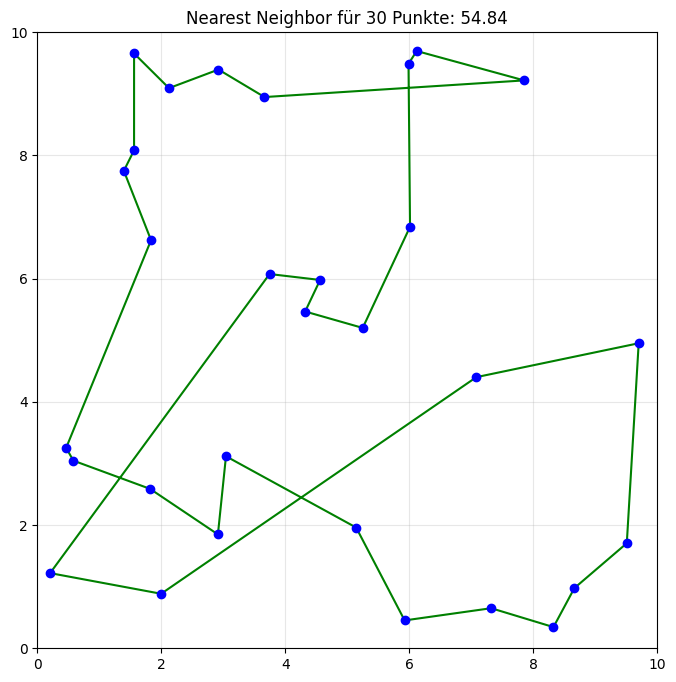

In [11]:
# Visualisiere die gefundene Route für den großen Datensatz
plt.figure(figsize=(8, 8))
plt.scatter(x_large, y_large, color='blue', zorder=5)
xs_large = [p[0] for p in nn_route_large] + [nn_route_large[0][0]]
ys_large = [p[1] for p in nn_route_large] + [nn_route_large[0][1]]
plt.plot(xs_large, ys_large, color='green', linewidth=1.5, marker='o', markersize=4)
plt.title(f"Nearest Neighbor für 30 Punkte: {nn_distance_large:.2f}")
plt.grid(True, alpha=0.3)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

## 5. Fazit: Nearest-Neighbor für das TSP

Der Nearest-Neighbor-Algorithmus bietet eine einfache und effiziente Heuristik für das Traveling Salesman Problem. Obwohl er keine optimale Lösung garantiert, ist er in der Praxis oft sehr nützlich.

### Stärken:
- Einfach zu verstehen und zu implementieren
- Quadratische Laufzeit ($O(n^2)$), daher auch für größere Probleminstanzen nutzbar
- Liefert in vielen praktischen Anwendungen akzeptable Lösungen

### Schwächen:
- Keine Qualitätsgarantie für die gefundene Lösung
- Kann in speziellen Fällen sehr schlechte Lösungen liefern
- Die Lösungsqualität hängt stark vom gewählten Startpunkt ab

### Praxistipp:
In der Praxis empfiehlt es sich, den Nearest-Neighbor-Algorithmus mit verschiedenen Startpunkten auszuführen und die beste Lösung zu wählen. Eine weitere Verbesserungsmöglichkeit ist die nachträgliche Optimierung der gefundenen Route durch lokale Suchverfahren wie den 2-opt- oder 3-opt-Algorithmus.